# Finetune Segment Anything Model (SAM) using SamLoRA

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finetune Segment Anything Model (SAM) using SamLoRA" data-toc-modified-id="Finetune Segment Anything Model (SAM) using SamLoRA"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finetune Segment Anything Model (SAM) using SamLoRA</a></span><ul class="toc-item">
    <li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li>
    <li><span><a href="#SAM-architecture" data-toc-modified-id="SAM-architecture-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SAM architecture</a></span></li>
    <li><span><a href="#SamLoRA-architecture" data-toc-modified-id="SamLoRA-architecture-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>SamLoRA architecture</a></span></li>
    <li><span><a href="#Implementation-in-arcgis.learn" data-toc-modified-id="Implementation-in-arcgis.learn-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Implementation in <code>arcgis.learn</code></a></span></li>
    <li><span><a href="#Training-and-inference" data-toc-modified-id="Training-and-inference-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Training and inference</a></span></li>
    <li><span><a href="#References" data-toc-modified-id="References-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>References</a></span></li>
    </ul></li></ul></div>

## Introduction

Segmentation models are a class of deep learning models that perform a pixel-wise classification of the image. The classified pixels correspond to different objects or regions in the image. These models have a wide variety of use cases across multiple domains. When used with satellite and aerial imagery, these models can help to identify features such as building footprints, roads, water bodies, crop fields, etc.

Generally, every segmentation model needs to be trained from scratch using a dataset labeled with the objects of interest. This can be an arduous and time-consuming task. Meta's Segment Anything Model (SAM) is aimed at creating a foundational model that can be used to segment (as the name suggests) anything using zero-shot learning and generalize across domains. SAM is trained on the Segment Anything 1-Billion mask dataset (SA-1B) which comprises a diverse set of 11 million images and over 1 billion masks. This makes the model highly robust in identifying object boundaries and differentiating between various objects even though it might have never seen them before.

Despite SAM being a pioneering model for vision tasks, it comes with its own set of problems. The model segments everything. It will identify all object boundaries in an image and segment all the objects it can detect in the entire image. It can also identify edges within a single object and segment them as different objects. The model segments all objects in the image but isn't capable of labeling the segments. This is a problem if one wants to segment only a particular class in the image. If one would like to train or finetune the model, the large number of parameters makes it an expensive task computationally.

SamLoRA, a variation of SAM that adds a set of trainable layers called Low-Rank Adaption (LoRA) to the frozen image encoder of SAM, addresses these limitations. Before delving into the details of SamLoRA, let's look at the model architecture of SAM.

## SAM architecture

SAM's architecture comprises three major components - an image encoder, a prompt encoder, and a mask decoder. The image encoder is a Vision Transformer (ViT). The prompt encoder takes the prompt in the form of a point or bounding box coordinates and transforms them into embeddings. The Mask decoder takes the embeddings from the image encoder and prompt encoder and creates masks corresponding to the different segments in the image.

<figure>    
   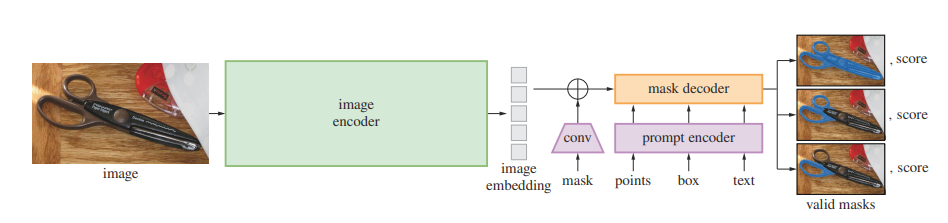
    <br>
    <center>
    <figcaption>Figure 1: Segment Anything Model (SAM) architecture overview [1]</figcaption>
    </center>
</figure>

## SamLoRA architecture

SamLoRA freezes the image encoder and adds Low-Rank Adaption (LoRA) layers to the transformer blocks in the image encoder. These LoRA layers have far fewer parameters, which makes the encoder trainable with relatively less compute. The Prompt encoder is not provided with any prompts, and default embeddings are used instead. These design modifications enable the model to preserve its knowledge of generalized features in an image while also adapting to a new domain relatively quickly and with less training. The mask decoder is modified to output masks indexed according to the class ID, which solves the problem of labeled segmentation.

<figure>    
   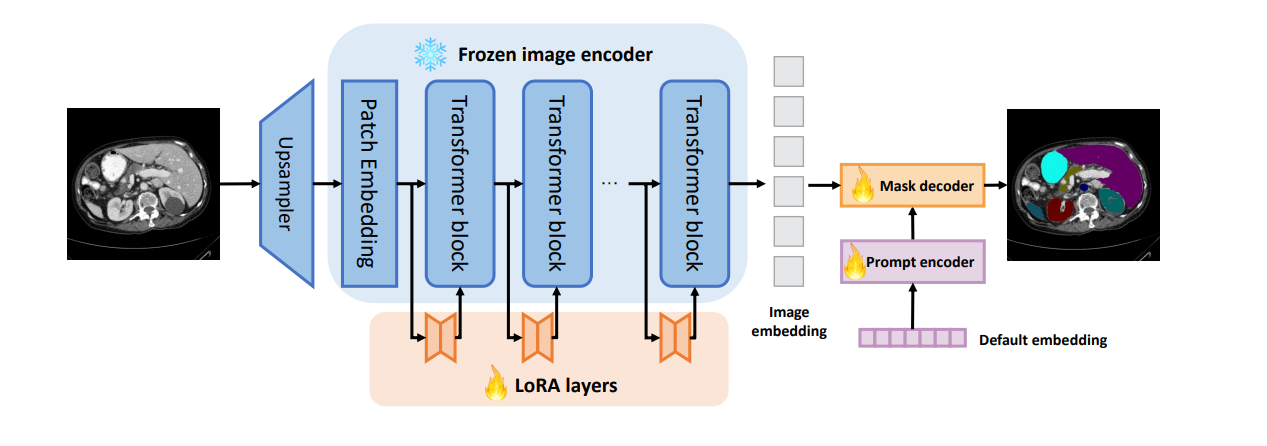
    <br>
    <center>
    <figcaption>Figure 2: SamLoRA architecture overview [2]</figcaption>
    </center>
</figure>

## Implementation in `arcgis.learn`

Using SamLoRA with arcgis.learn is as simple as using any other pixel classification model in the library.

In [ ]:
model = SamLoRA(data)

The parameters required are:

- `data` - the data object prepared using `prepare_data`  
- `backbone` - the SAM pretrained backbone to be used to initialize the model. The available backbones are `vit_b`, `vit_l`, and `vit_h`. The default backbone is `vit_b`.

## Training and inference

The SamLoRA model can be trained using the `fit` method.

In [ ]:
model.fit()

During training, the SAM pretrained backbone remains frozen. This helps in retaining the feature representations of the original model. You can unfreeze the entire model using the `unfreeze` method.

Alternatively, the [Train Deep Learning Model](https://pro.arcgis.com/en/pro-app/latest/tool-reference/image-analyst/train-deep-learning-model.htm) tool in ArcGIS Pro can be used to train the models.
Models trained through the API or ArcGIS Pro can be used for inferencing using the [Detect Objects Using Deep Learning](https://pro.arcgis.com/en/pro-app/latest/tool-reference/image-analyst/detect-objects-using-deep-learning.htm) tool in ArcGIS Pro.

For more information about the API, visit the [API reference for SamLoRA](https://developers.arcgis.com/python/api-reference/arcgis.learn.toc.html#samlora).

## References

[1] Alexander Kirillov, Eric Mintun, Nikhila Ravi, Hanzi Mao, Chloe Rolland, Laura Gustafson, Tete Xiao, Spencer Whitehead, Alexander C. Berg, Wan-Yen Lo, Piotr Dollár, Ross Girshick: "Segment Anything", 2023; [arXiv:2304.02643](https://arxiv.org/abs/2304.02643).

[2] Kaidong Zhang, Dong Liu: "Customized Segment Anything Model for Medical Image Segmentation", 2023; [arXiv:2304.13785](https://arxiv.org/abs/2304.13785)